In [1]:
import torch
model = torch.hub.load('pytorch/vision:v0.4.2', 'squeezenet1_0', pretrained=True)
from sklearn.linear_model import Lasso
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
import urllib
from PIL import Image
from torchvision import transforms

Using cache found in C:\Users\44754/.cache\torch\hub\pytorch_vision_v0.4.2


## Import SqueezeNet, image and ImageNet labels

In [2]:
# Download an example image from the pytorch website
url, filename = ("https://github.com/pytorch/hub/raw/master/dog.jpg", "dog.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)
    
# sample execution (requires torchvision)
input_image = Image.open(filename)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)

In [3]:
with open("imagenet1000_clsidx_to_labels.txt") as f:
    idx2label = eval(f.read())
out = torch.nn.functional.softmax(output[0], dim=0)
for idx in out.sort()[1][-5:]:
    print(idx2label[idx.item()])

collie
Arctic fox, white fox, Alopex lagopus
Eskimo dog, husky
papillon
Samoyed, Samoyede


## Superpixels

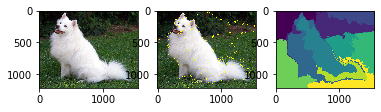

In [4]:
segments = slic(input_image, n_segments = 10, sigma = 5)
plt.subplot(1,3,1); plt.imshow(input_image)
plt.subplot(1,3,2); plt.imshow(mark_boundaries(input_image, segments))
plt.subplot(1,3,3); plt.imshow(segments)

## Local Interpretable Model-Agnostic Explanations (LIME)